In [35]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

import zipfile_deflate64 as zipfile
from urllib.request import urlretrieve

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [36]:
def download_and_unzip(url, save_path):
    print(f"Downloading {url}...", end="")

    urlretrieve(url, save_path)

    try:
        with zipfile.ZipFile(save_path) as zf:
            zf.extractall(os.path.split(save_path)[0])

            print("Done")

    except Exception as e:
        print("Invalid file.", e)

In [37]:
URL = r"https://www.dropbox.com/s/ld535c8e0vueq6x/opencv_bootcamp_assets_NB11.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB11.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

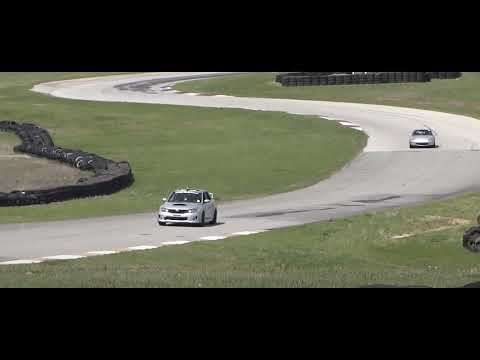

In [38]:
video = YouTubeVideo('XkJCvtCRdVM', width=640, height=480)
display(video)

In [39]:
video_input_file_name = "race_car.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (0,0,255), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    plt.axis("off")

def drawText(frame, txt, location, color=(50, 170, 50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)
    

### Create the Tracker instance

In [44]:
tracker_type = "MIL"
tracker = cv2.TrackerMIL.create()

### Read input video & Setup output video

In [45]:
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()

if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

video_output_file_name = "race_car-" + tracker_type + ".mp4"
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*'XVID'), 30, (width, height))

print(video_output_file_name)

race_car-MIL.mp4


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### Define Bounding Box

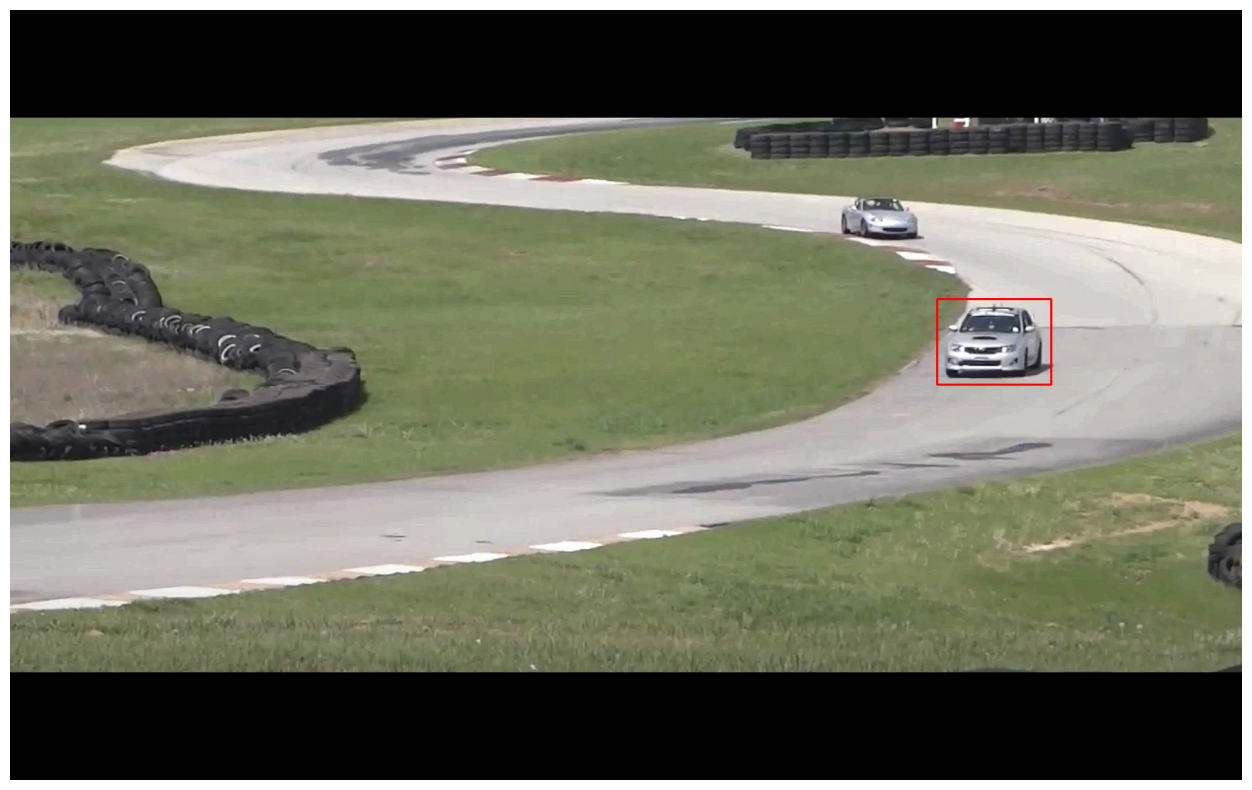

In [46]:
bbox = (1300, 405, 160, 120)
displayRectangle(frame, bbox)

### Initialize Tracker

In [48]:
ok = tracker.init(frame, bbox)

### Read frame and Track Object

In [49]:
while True:
    ok, frame = video.read()
    if not ok:
        break

    timer = cv2.getTickCount()

    ok, bbox = tracker.update(frame)

    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    if ok:
        drawRectangle(frame, bbox)
    else:
        drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))

    drawText(frame, tracker_type + " Tracker", (80, 60))
    drawText(frame, "FPS : " + str(int(fps)), (80, 100))

    video_out.write(frame)

video.release()
video_out.release()



In [50]:
!ffmpeg -y -i {video_output_file_name} -c:v libx264 "race_car_track_x264.mp4"  -hide_banner -loglevel error


In [52]:
mp4 = open("./race_car_track_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")